<a href="https://colab.research.google.com/github/junghyungit/ESAA-homework-public-/blob/junghyungit-hw08.apply%5D/EDA_To_Prediction(DieTanic)_%EC%BA%90%EA%B8%80_%ED%95%84%EC%82%AC_%EB%B0%9C%ED%91%9C_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 from google.colab import drive

drive.mount('/content/drive', force_remount=True)

ModuleNotFoundError: No module named 'google'

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
data = pd.read_csv('G:/내 드라이브/ESAA_21_1/ob2주차 타이타닉 생존자 예측/train.csv')

# Part1: Exploratory Data Analysis(EDA)

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## How many Survived??

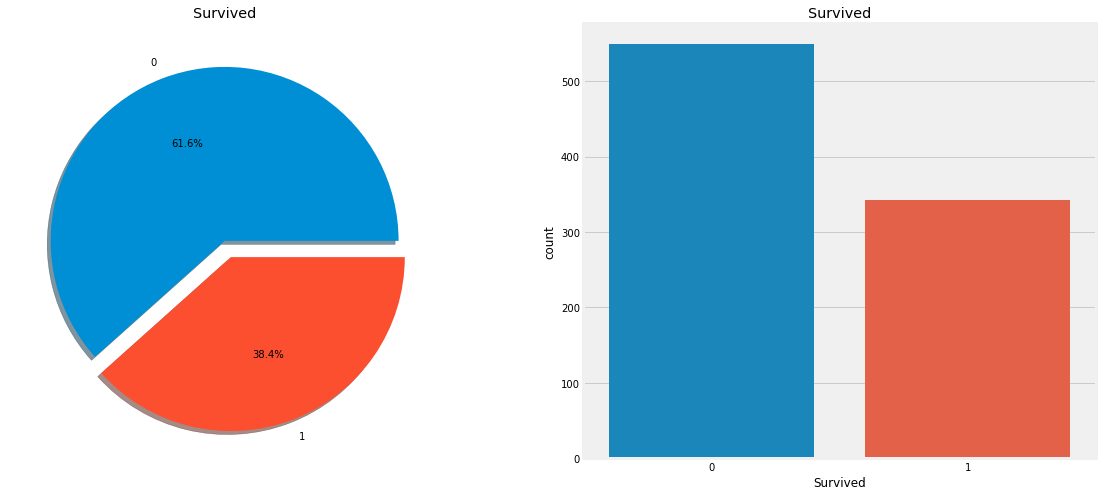

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## Analysing The Features

### Sex--> Categorical Feature

In [10]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

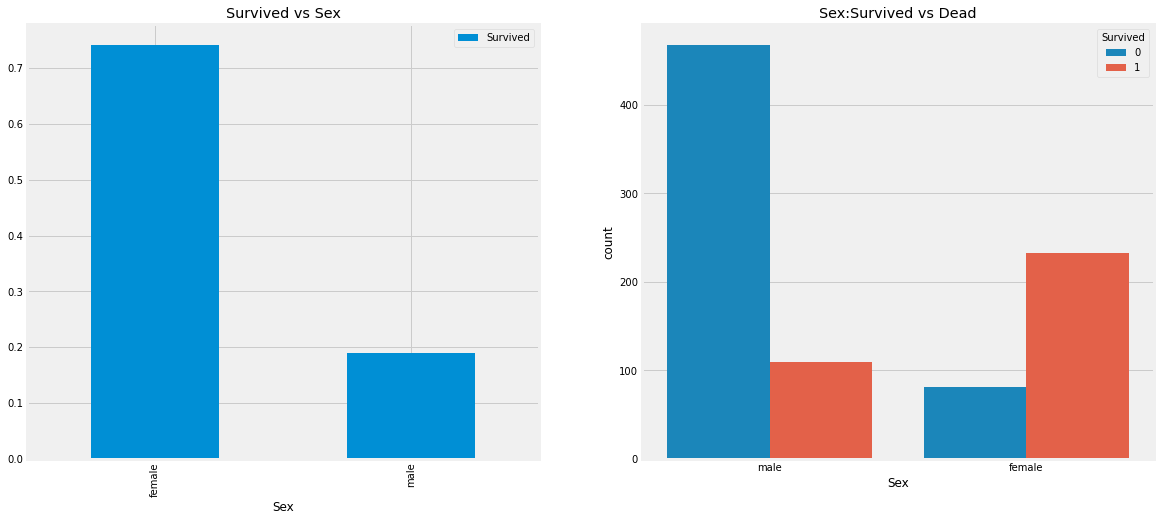

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

### Pclass --> Ordinal Feature

In [12]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


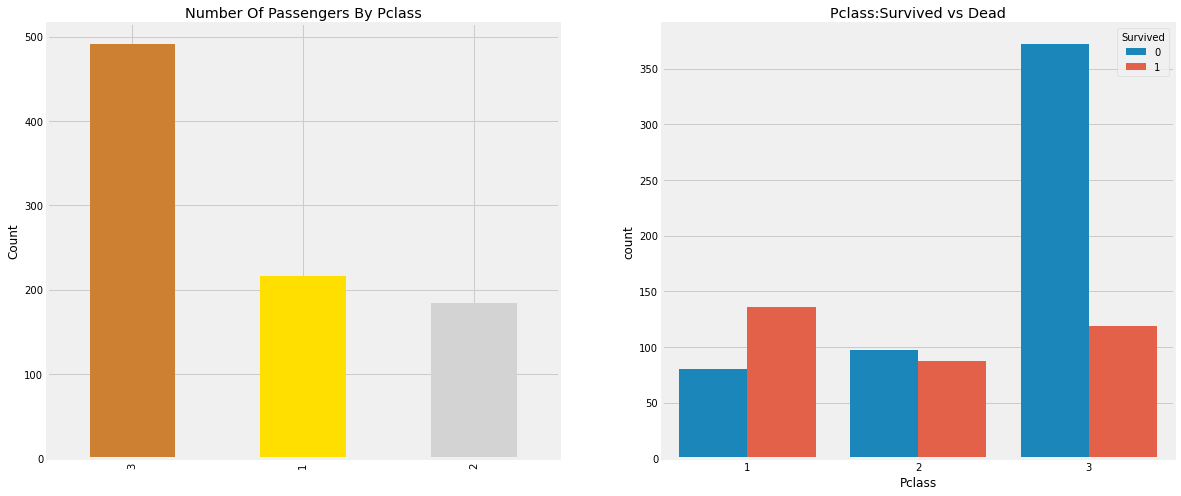

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [14]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

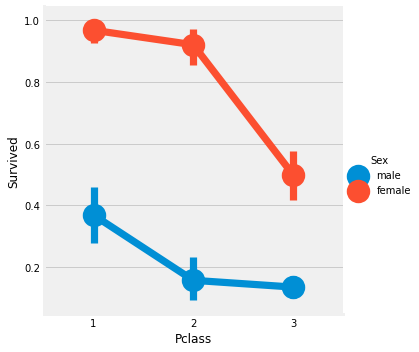

In [15]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

### Age--> Continous Feature

In [16]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


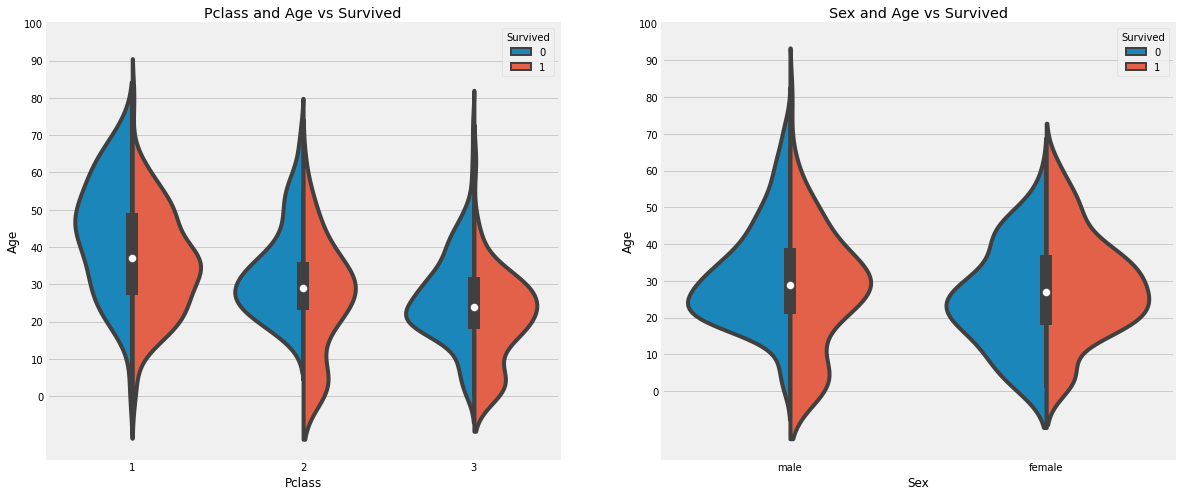

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [18]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [19]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


### Filling NaN Ages

In [20]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [21]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [22]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [23]:
data.Age.isnull().any() #So no null values left finally 

False

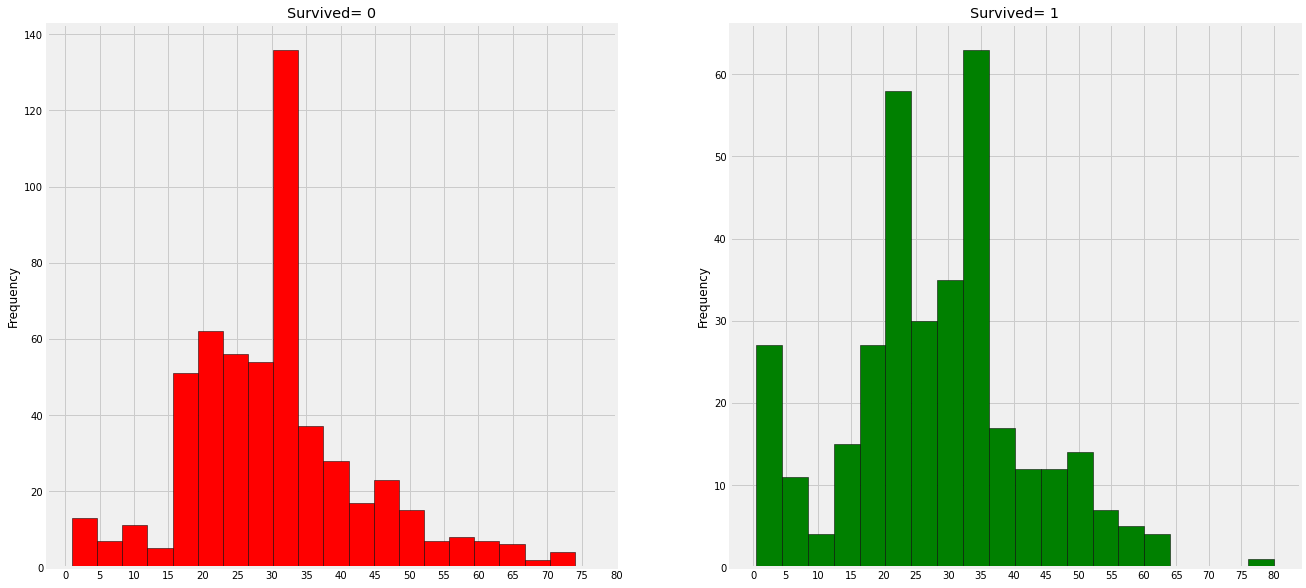

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

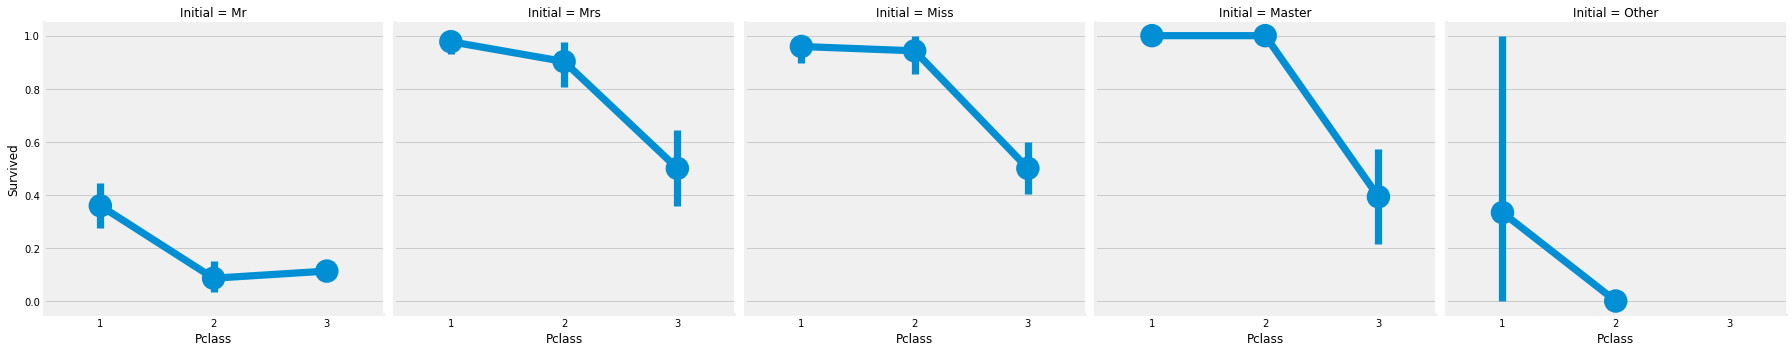

In [25]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

In [26]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

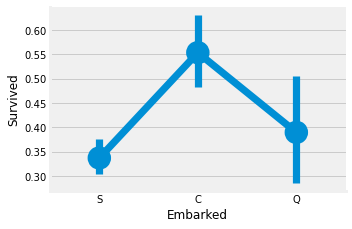

In [27]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

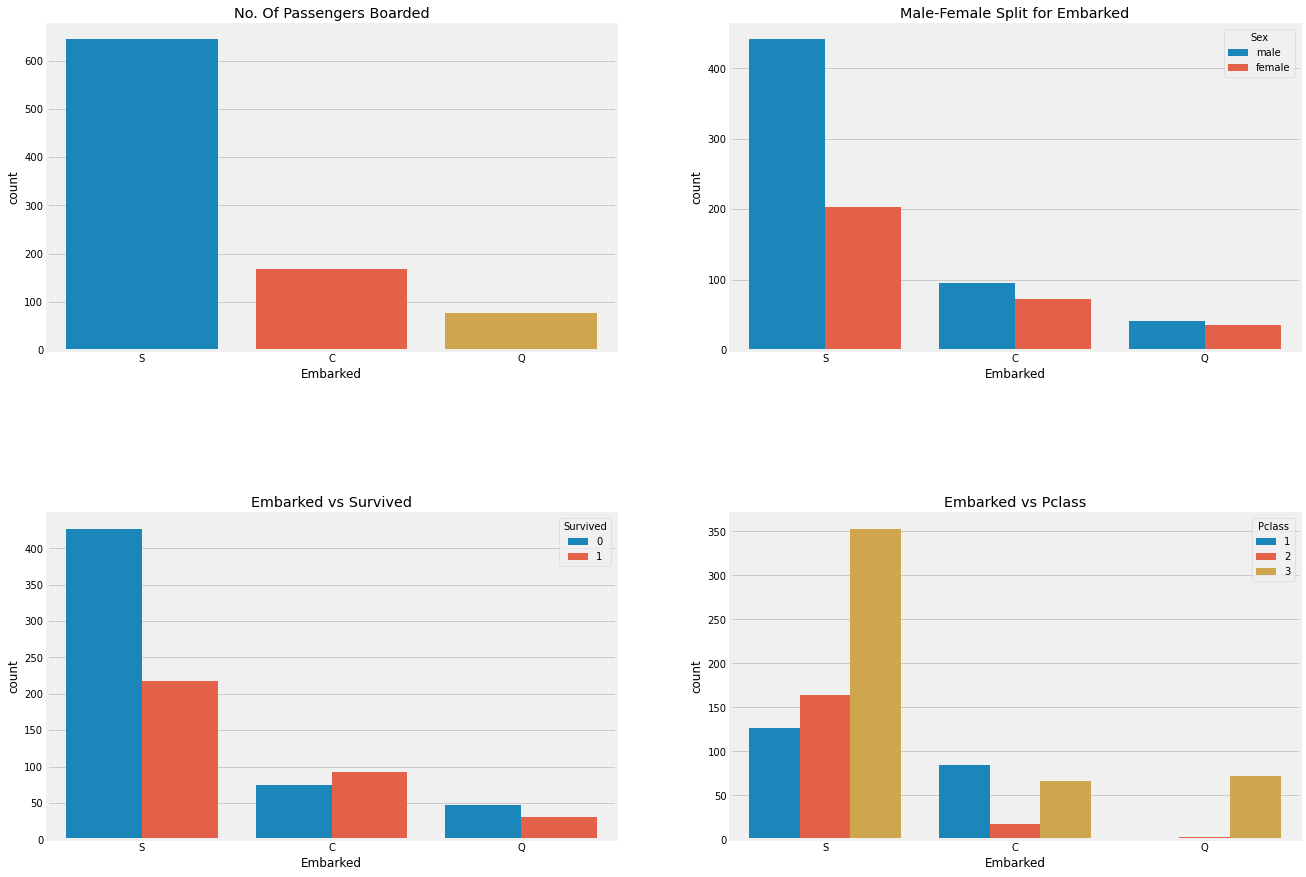

In [28]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

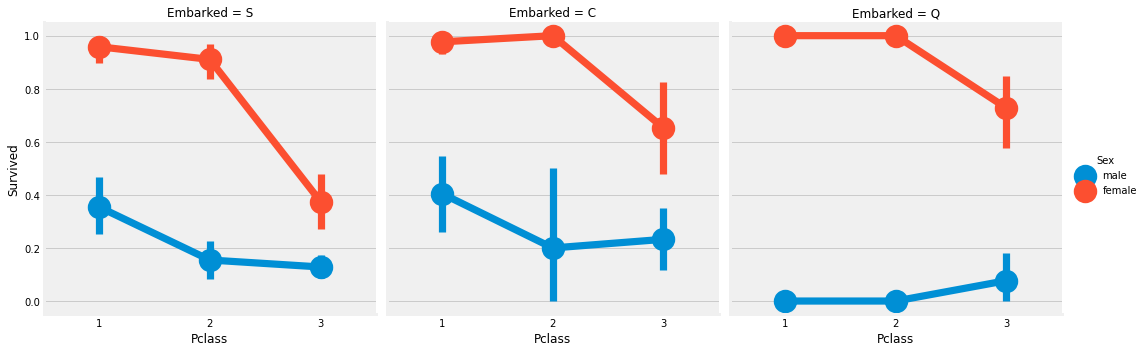

In [29]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

In [30]:
data['Embarked'].fillna('S',inplace=True)

In [31]:
data.Embarked.isnull().any()# Finally No NaN values

False

In [32]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


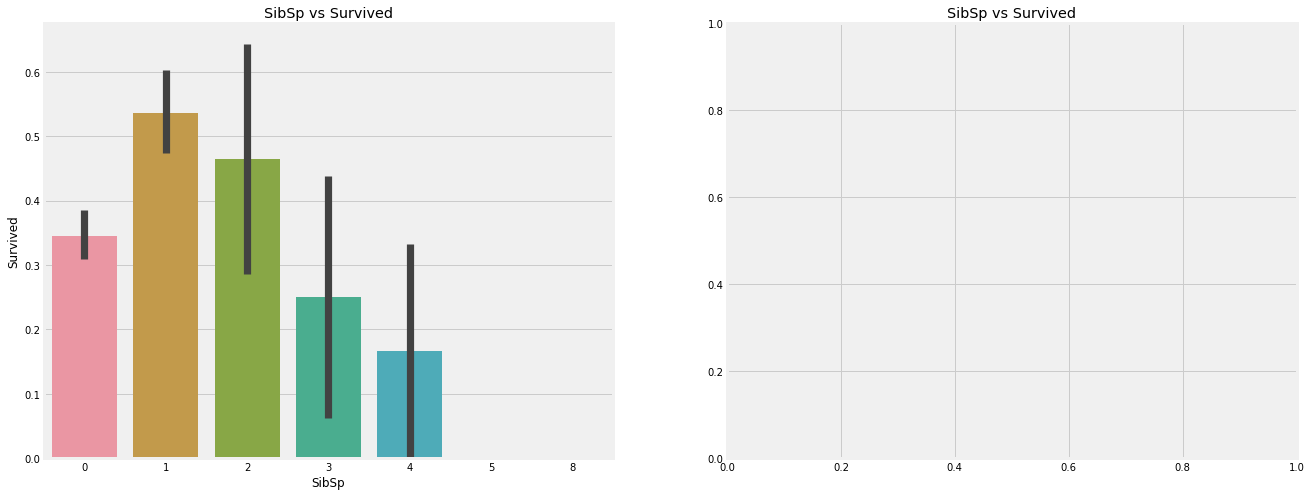

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [34]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [35]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


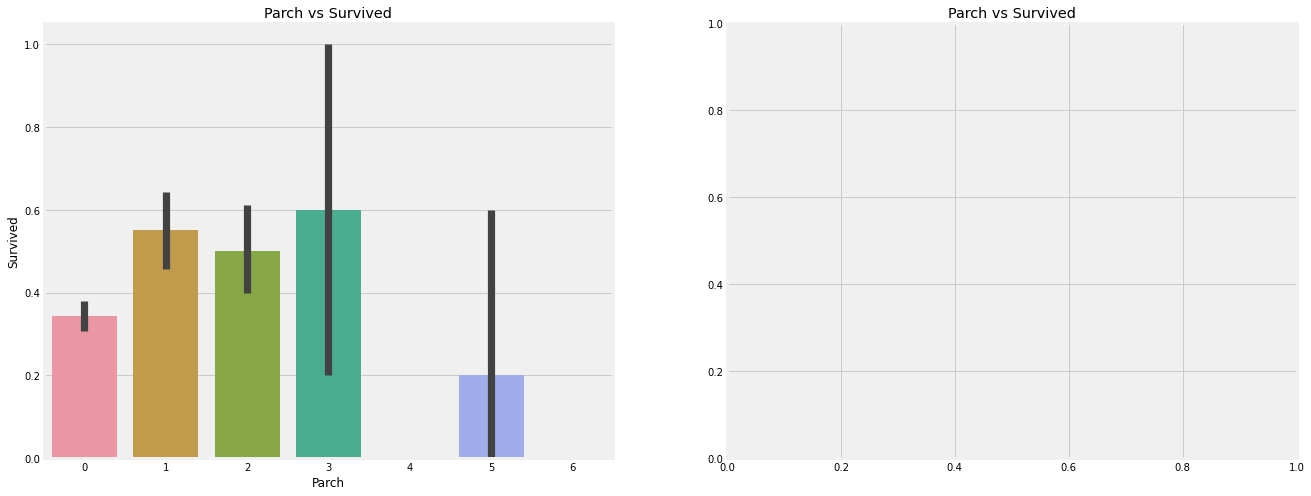

In [36]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

In [37]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


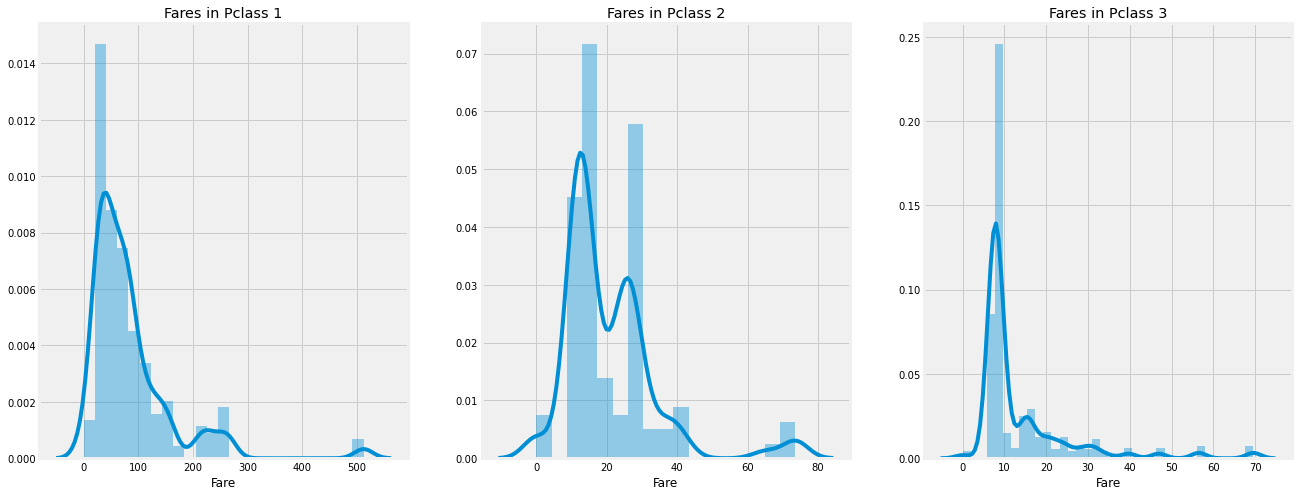

In [38]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

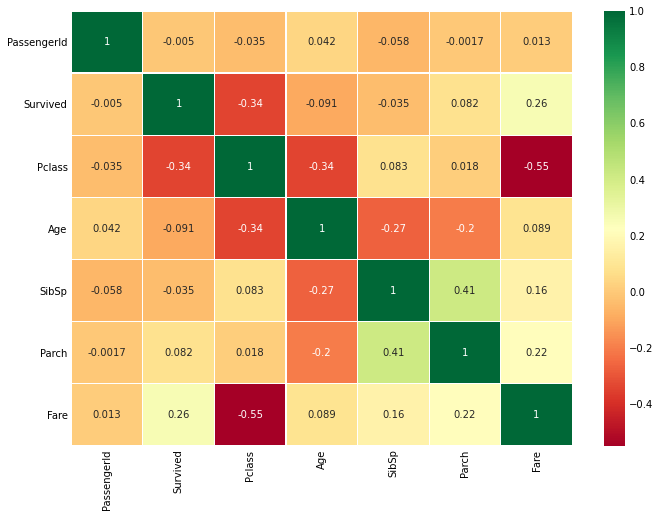

In [39]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Part2: Feature Engineering and Data Cleaning

## Age_band

In [40]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [41]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


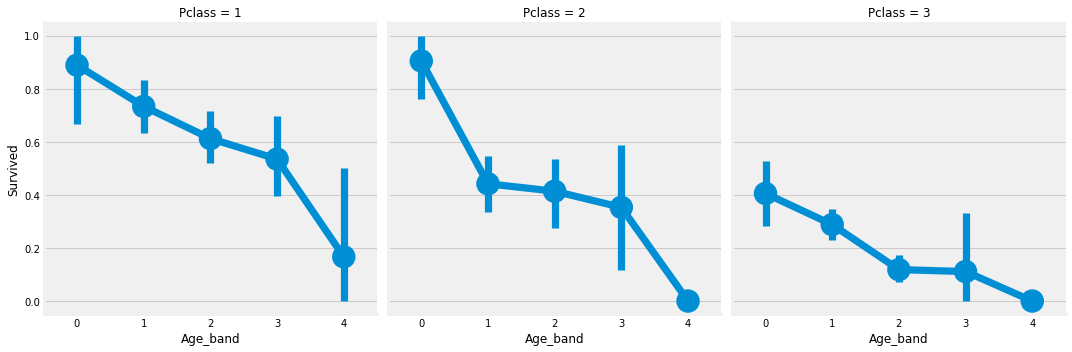

In [42]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

## Family_Size and Alone

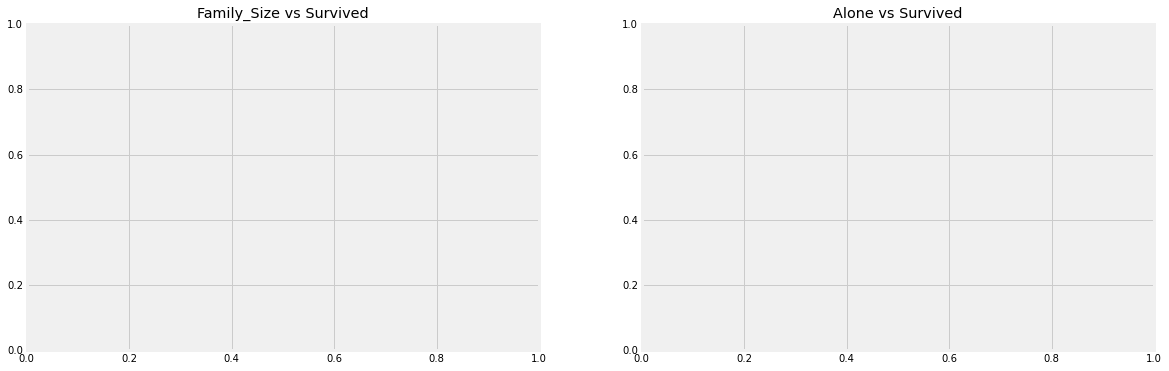

In [43]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

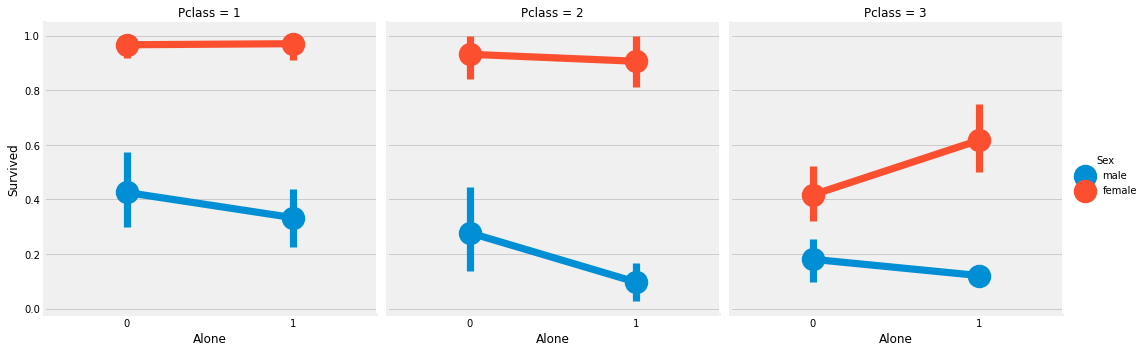

In [44]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

## Fare_Range

In [45]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [46]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

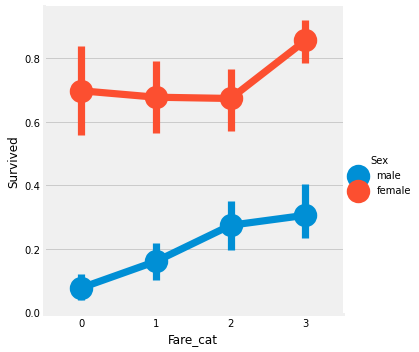

In [47]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

## Converting String Values into Numeric

In [48]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

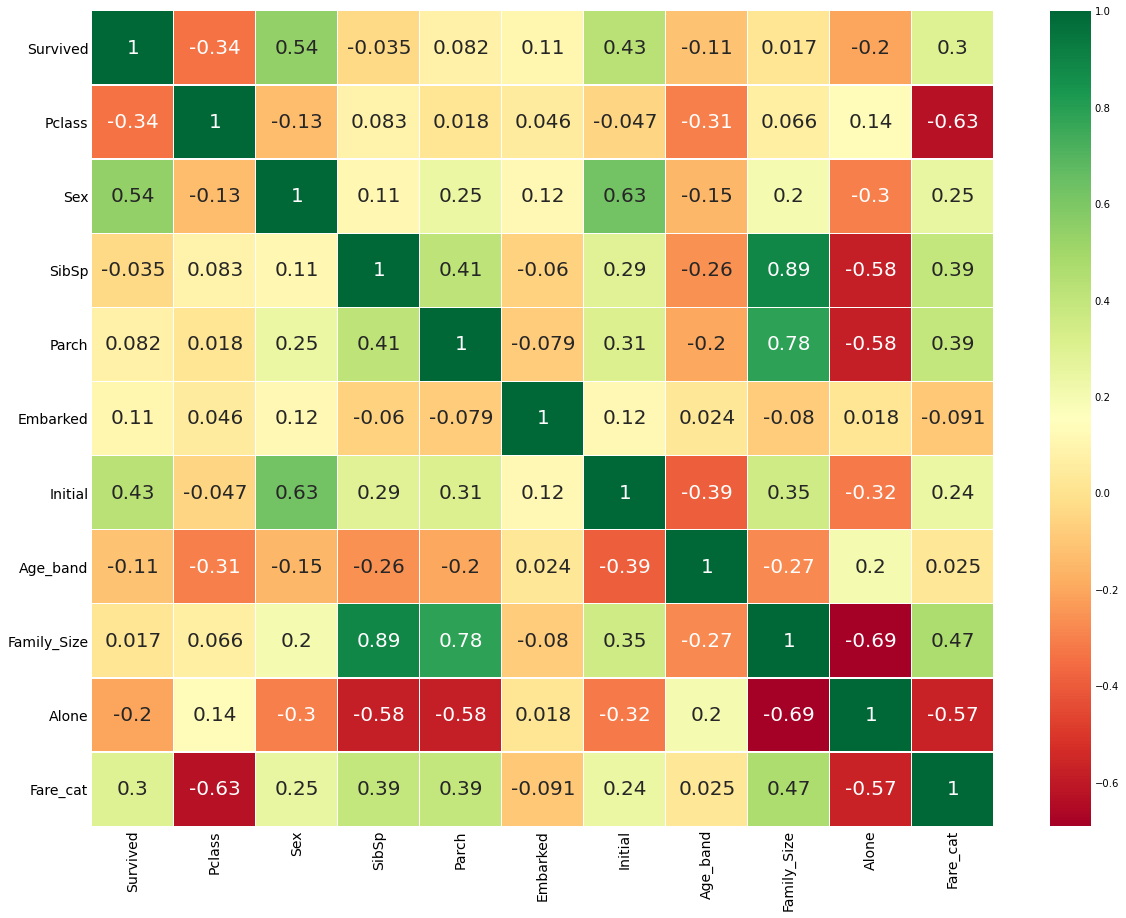

In [49]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Part 3 : Predictive Modeling
  
1) logistic regression  
2) support vector machines(linear and radial)  
3) random forest  
4) k-nearest neighbours  
5) naive bayes  
6) decision tree  
7) logistic regression

In [50]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [51]:
train, test = train_test_split(data, test_size = 0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

#### Radial Support Vector Machines(rbf-SVM)

In [52]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


#### Linear Support Vector Machines(linear-SVM)

In [53]:
model = svm.SVC(kernel = 'linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776


#### Logistic Regression

In [54]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


#### Decision Tree

In [55]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


#### K-Nearest Neighbours(KNN)

In [56]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.832089552238806


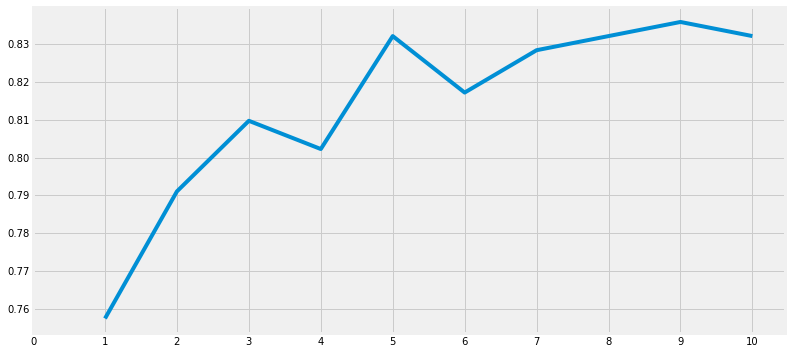

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [57]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

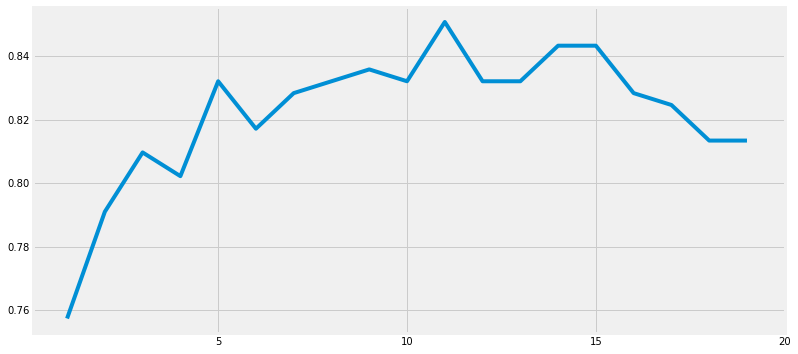

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955 0.85074627 0.83208955
 0.83208955 0.84328358 0.84328358 0.82835821 0.82462687 0.81343284
 0.81343284] with the max value as  0.8507462686567164


In [58]:
## my trial
a_index=list(range(1,20))
a=pd.Series()
x=[5,10,15,20]
for i in list(range(1,20)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

#### Gassian Naive Bayes

In [59]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


#### Random Forests

In [60]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8171641791044776


## Cross Validation

In [61]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.806991,0.031859
Naive Bayes,0.801386,0.028999
Random Forest,0.805868,0.031570


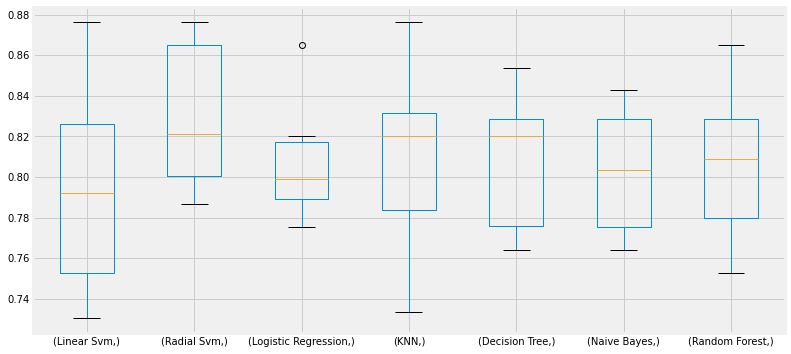

In [62]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

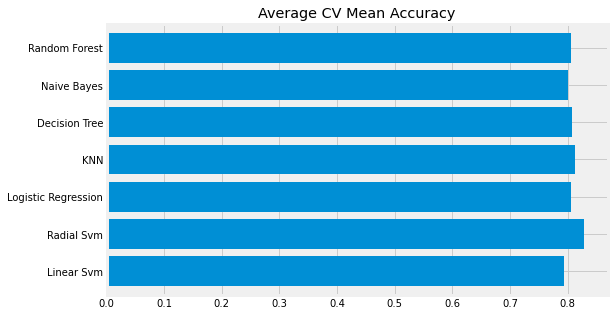

In [63]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

## Confusion Matrix

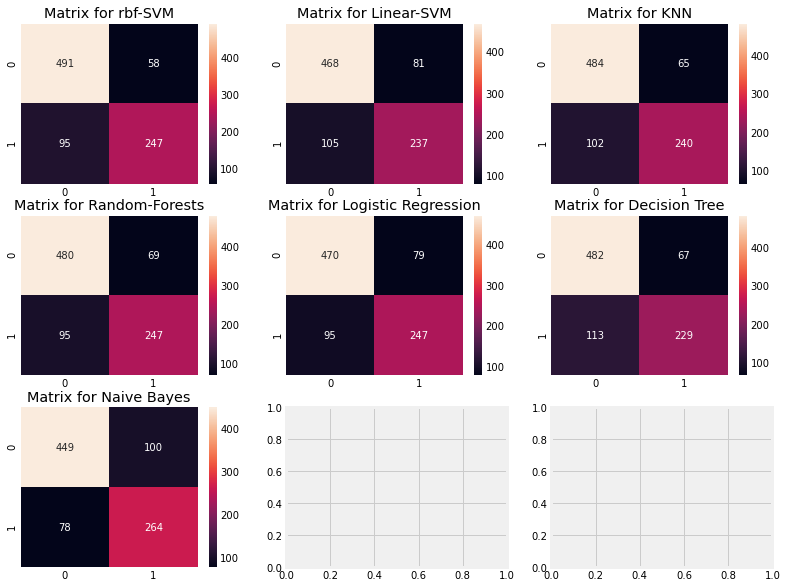

In [64]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

## Hyperparamters Tuning

#### SVM

In [65]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

## Random Forests

In [ ]:
n_estimators = range(100,1000,100)
hyper = {'n_estimators':n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

#### Ensembling

## Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

## Bagging

In [ ]:
#Bagged KNN
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=2), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv = 10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

In [ ]:
#Bagged DecisionTree
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

In [ ]:
#knn
from sklearn.ensemble import BaggingClassifier

model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

In [ ]:
#decisiontree
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

## Boosting

In [ ]:
#AdaBoost(Adaptive Boosting)
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

In [ ]:
#Stochastic Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

In [ ]:
#XGBoost
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validaed score for XGBoost is:', result.mean())

In [ ]:
#Hyperparameter tuning for AdaBoost
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

In [ ]:
# Confusion Matrix for the Best Model
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## Feature Importance

In [ ]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

## 0402 발표

#1)decision tree

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy= accuracy_score(y_test, pred)
    precision= precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1= f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

## 모델 피팅팅

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

In [68]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

In [69]:
#DecisionTree Classifier 생성
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(train_X,train_Y)

DecisionTreeClassifier(random_state=156)

In [76]:
from sklearn.tree import export_graphviz
import pydotplus
feature_names1 = data.columns.tolist()[1:12]
class_names = np.array(['survived','not survived'])
dot_data=export_graphviz(dt_clf,out_file='tree.dot',class_names=class_names ,feature_names=feature_names1, impurity=True, filled=True)

In [77]:
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"5,5!"')
pydot_graph.write_png('resized_tree.png')

TypeError: object of type 'NoneType' has no len()

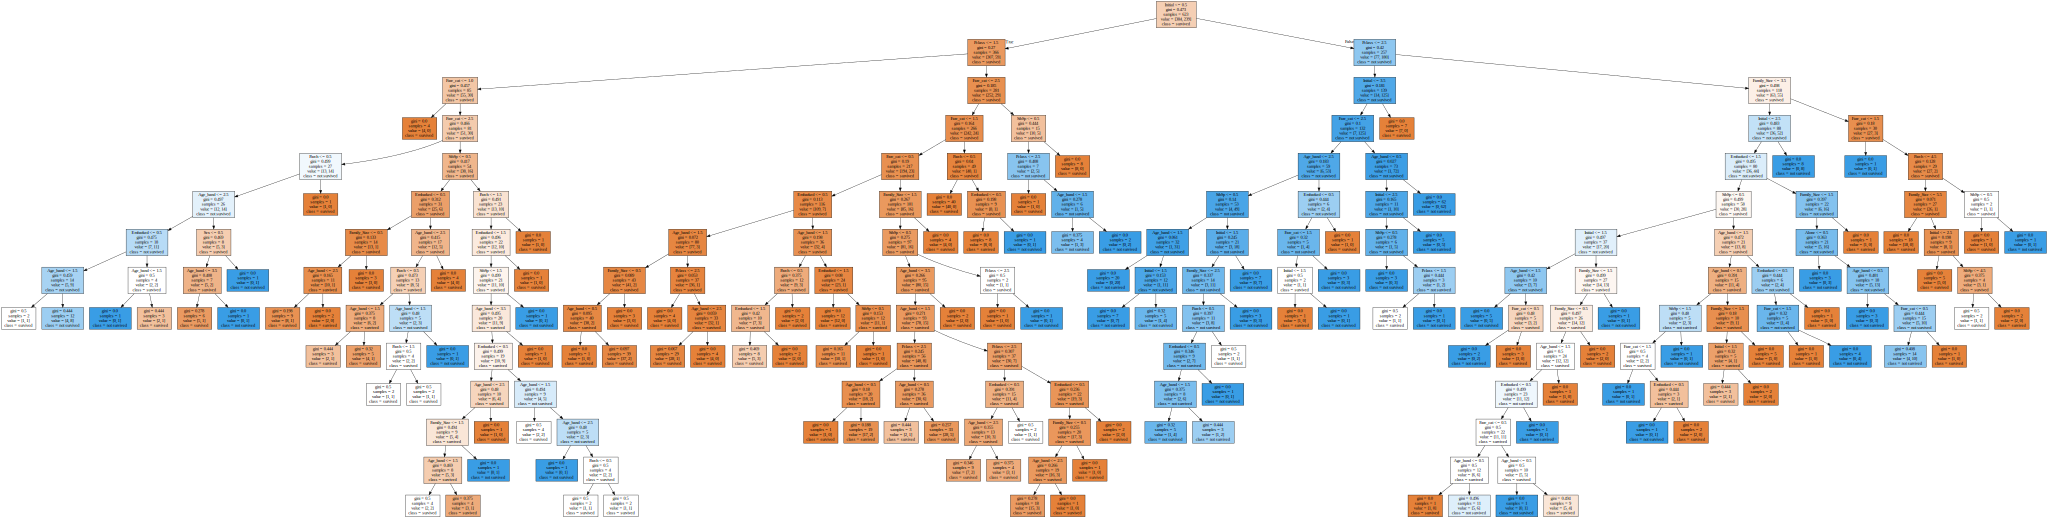

In [287]:
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.167 0.004 0.046 0.015 0.05  0.504 0.071 0.072 0.002 0.069]
Pclass:0.167
Sex:0.004
SibSp:0.046
Parch:0.015
Embarked:0.050
Initial:0.504
Age_band:0.071
Family_Size:0.072
Alone:0.002
Fare_cat:0.069


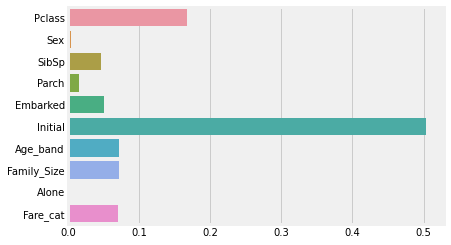

In [288]:
import seaborn as sns
import numpy as np
%matplotlib inline

print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))
for name, value in zip(feature_names,dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name,value))
sns.barplot(x=dt_clf.feature_importances_,y=feature_names)

In [289]:
pred = dt_clf.predict(test_X)
accuracy = accuracy_score(test_Y,pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.8060
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [78]:
params = {'max_depth' : [2,3,4,5,6,8,10,12,16,20,24]}
grid_cv = GridSearchCV(dt_clf,param_grid=params, scoring = 'accuracy',cv=5,verbose=1)
grid_cv.fit(train_X,train_Y)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라매터:',grid_cv.best_params_)
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth','mean_test_score']]

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GridSearchCV 최고 평균 정확도 수치: 0.8138
GridSearchCV 최적 하이퍼 파라매터: {'max_depth': 4}


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.5s finished


,param_max_depth,mean_test_score
0,2,0.775342
1,3,0.799252
2,4,0.813781
3,5,0.800968
4,6,0.797781
5,8,0.794606
6,10,0.801045
7,12,0.799445
8,16,0.801019
9,20,0.801019


In [79]:
max_depths = [1,2,3,4,5,6,8,10,12,16,20,24]
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth,random_state=156)
    dt_clf.fit(train_X,train_Y)
    pred = dt_clf.predict(test_X)
    accuracy = accuracy_score(test_Y,pred)
    print('max_depth={0} 정확도: {1:.4f}'.format(depth,accuracy))

max_depth=1 정확도: 0.7910
max_depth=2 정확도: 0.7836
max_depth=3 정확도: 0.8396
max_depth=4 정확도: 0.8246
max_depth=5 정확도: 0.8022
max_depth=6 정확도: 0.8097
max_depth=8 정확도: 0.8060
max_depth=10 정확도: 0.8022
max_depth=12 정확도: 0.8022
max_depth=16 정확도: 0.8060
max_depth=20 정확도: 0.8060
max_depth=24 정확도: 0.8060


In [84]:
params = {
    'max_depth' : [1,2,3,4,5,8,10,12,16,20],
    'min_samples_split' : [16,20,40],
}
grid_cv = GridSearchCV(dt_clf,param_grid=params, scoring = 'accuracy',cv=5,verbose=1)
grid_cv.fit(train_X,train_Y)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라매터:',grid_cv.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GridSearchCV 최고 평균 정확도 수치: 0.8089
GridSearchCV 최적 하이퍼 파라매터: {'max_depth': 4, 'min_samples_split': 20}


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished


In [86]:
best_df_clf=grid_cv.best_estimator_
pred1 = best_df_clf.predict(test_X)
accuarcy = accuracy_score(test_Y,pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8060


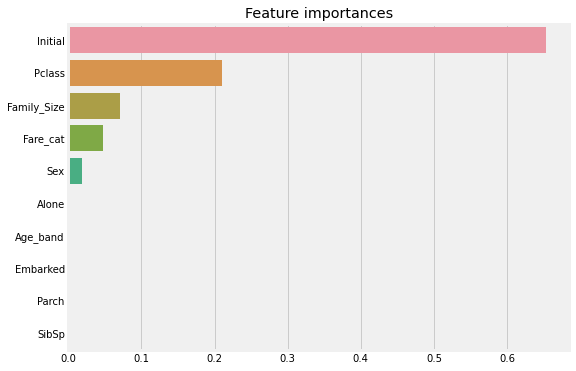

In [87]:
ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_X.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20, y= ftr_top20.index)
plt.show()

In [295]:
#visualize_boundary(dt_clf,train_X,train_Y)  #책의 부록 참고

In [296]:
data2 = data.copy()
data2 = data2.drop(['Initial'],axis=1)
data2

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,1,1,0,0
1,1,1,1,1,0,1,2,1,0,3
2,1,3,1,0,0,0,1,0,1,1
3,1,1,1,1,0,0,2,1,0,3
4,0,3,0,0,0,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,0,1,0,1,1
887,1,1,1,0,0,0,1,0,1,2
888,0,3,1,1,2,0,1,3,0,2
889,1,1,0,0,0,1,1,0,1,2


In [297]:
train,test=train_test_split(data2,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data2[data2.columns[1:]]
Y=data2['Survived']

In [298]:
#DecisionTree Classifier 생성
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(train_X,train_Y)
params = {
    'max_depth' : [8,10,12,16,20],
    'min_samples_split' : [10,16,20],
}
grid_cv = GridSearchCV(dt_clf,param_grid=params, scoring = 'accuracy',cv=5,verbose=1)
grid_cv.fit(train_X,train_Y)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라매터:',grid_cv.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GridSearchCV 최고 평균 정확도 수치: 0.8010
GridSearchCV 최적 하이퍼 파라매터: {'max_depth': 8, 'min_samples_split': 10}


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.4s finished


In [299]:
best_df_clf=grid_cv.best_estimator_
pred1 = best_df_clf.predict(test_X)
accuarcy = accuracy_score(test_Y,pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8060


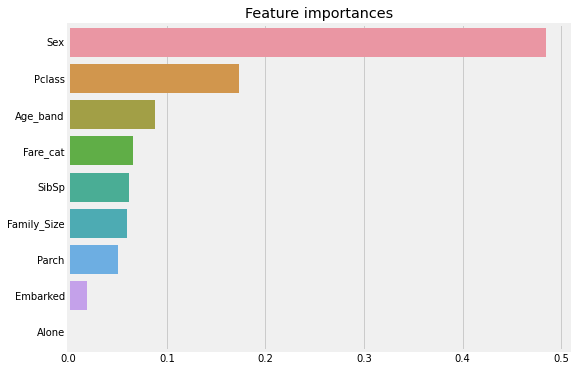

In [300]:
ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_X.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20, y= ftr_top20.index)
plt.show()

# 3)

In [306]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [307]:
dtrain = xgb.DMatrix(data=train_X, label=train_Y)
dtest = xgb.DMatrix(data=test_X, label=test_Y)

In [308]:
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metrix':'logloss',
          'early_stoppings':100}
num_rounds = 400

In [309]:
#train dataset는 'train'. evaluation(test) dataset는 'eval'로 명기합니다.
wlist = [(dtrain,'train'),(dtest,'eval')]
#하이퍼 파라미터와 early stopping파라미터를 train()함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=wlist)

[0]	train-error:0.168539	eval-error:0.160448
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 100 rounds.
[1]	train-error:0.168539	eval-error:0.160448
[2]	train-error:0.168539	eval-error:0.160448
[3]	train-error:0.168539	eval-error:0.160448
[4]	train-error:0.168539	eval-error:0.160448
[5]	train-error:0.168539	eval-error:0.160448
[6]	train-error:0.168539	eval-error:0.160448
[7]	train-error:0.168539	eval-error:0.160448
[8]	train-error:0.168539	eval-error:0.160448
[9]	train-error:0.168539	eval-error:0.160448
[10]	train-error:0.168539	eval-error:0.160448
[11]	train-error:0.168539	eval-error:0.160448
[12]	train-error:0.168539	eval-error:0.160448
[13]	train-error:0.168539	eval-error:0.160448
[14]	train-error:0.168539	eval-error:0.160448
[15]	train-error:0.168539	eval-error:0.160448
[16]	train-error:0.168539	eval-error:0.160448
[17]	train-error:0.168539	eval-error:0.160448
[18]	train-error:0.168539	eval-error

In [314]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

#예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측갑 결정해 리스트 객체인 preds에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨
[0.151 0.877 0.014 0.982 0.249 0.948 0.05  0.083 0.976 0.945]
예측값 10개만 표시: [0, 1, 0, 1, 0, 1, 0, 0, 1, 1]


In [ ]:
#p238(258)
get_clf_eval(test_Y, pred_probs)

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

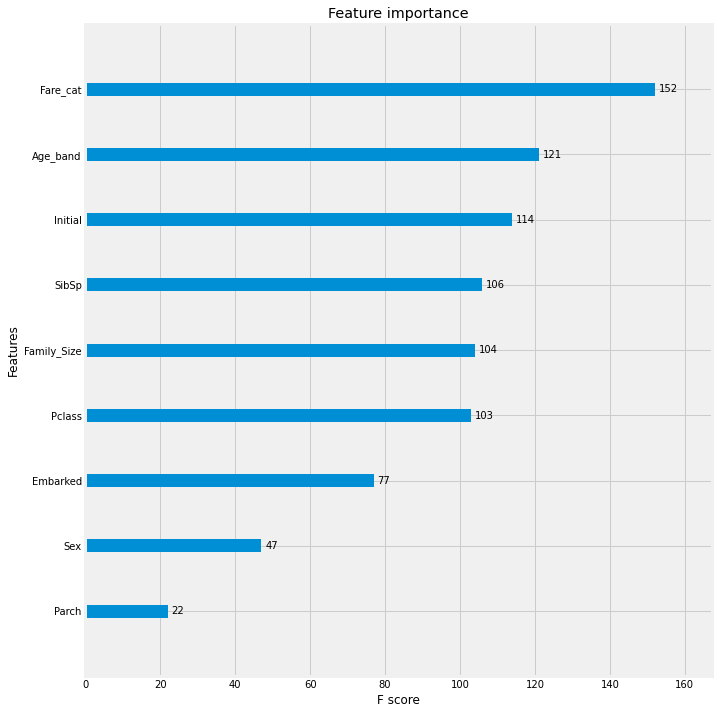

In [315]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model,ax=ax)

# 2)


In [316]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy= accuracy_score(y_test, pred)
    precision= precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1= f1_score(y_test, pred)
    #roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy,precision,recall,f1))

In [317]:
#라이브러리 호출
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #accuracy measure
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

In [318]:
#훈련/테스트 데이터 분리
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

## 랜덤 포레스트 하이퍼 파라미터 튜닝 및 시각화

In [319]:
params={'n_estimators':[100,200,300],'max_depth':[6,8,10,12,16,20,24],'min_samples_leaf':[8,12,18],'min_samples_split':[8,16,20]}

rf_clf=RandomForestClassifier(random_state=0,n_jobs=-1)
grid_cv=GridSearchCV(rf_clf,param_grid=params,cv=5,n_jobs=-1)
grid_cv.fit(train_X, train_Y)

print('RandomForestClassifier 기본 하이퍼 파라미터:\n', rf_clf.get_params())

print('최적의 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

RandomForestClassifier 기본 하이퍼 파라미터:
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
최적의 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도:0.8202


In [320]:

cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth','param_min_samples_leaf','param_min_samples_split','param_n_estimators','mean_test_score']]

,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_test_score
0,6,8,8,100,0.815406
1,6,8,8,200,0.813819
2,6,8,8,300,0.812219
3,6,8,16,100,0.815406
4,6,8,16,200,0.813819
...,...,...,...,...,...
184,24,18,16,200,0.813806
185,24,18,16,300,0.812206
186,24,18,20,100,0.813806
187,24,18,20,200,0.813806


In [321]:
model=RandomForestClassifier(n_estimators=100, max_depth=6,min_samples_leaf=12,min_samples_split=8)
model.fit(train_X,train_Y)
prediction10=model.predict(test_X)
get_clf_eval(test_Y, prediction10)

오차 행렬
[[151  14]
 [ 34  69]]
정확도: 0.8209, 정밀도: 0.8313, 재현율: 0.6699, F1:0.7419


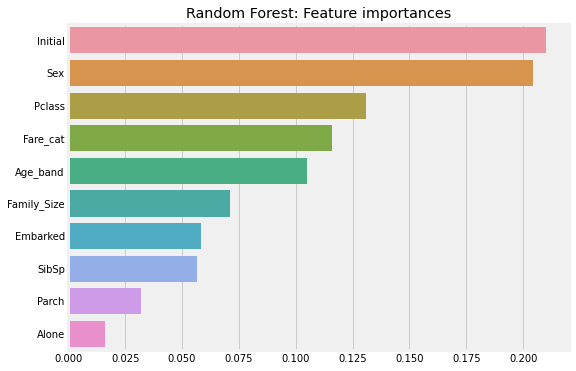

In [322]:
#랜덤 포레스트 피쳐 시각화
rf_clf.fit(train_X, train_Y)
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_X.columns )
ftr=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Random Forest: Feature importances')
sns.barplot(x=ftr,y=ftr.index)
plt.show()

## LightGBM

In [323]:
lgbm_wrapper = LGBMClassifier(n_estimators=400)

evals = [(test_X, test_Y)]
lgbm_wrapper.fit(train_X, train_Y, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose= True)
preds =  lgbm_wrapper.predict_proba(test_X)
pred_proba = lgbm_wrapper.predict_proba(test_X)[:,1]

[1]	valid_0's binary_logloss: 0.620174	valid_0's binary_logloss: 0.620174
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.583364	valid_0's binary_logloss: 0.583364
[3]	valid_0's binary_logloss: 0.553125	valid_0's binary_logloss: 0.553125
[4]	valid_0's binary_logloss: 0.527868	valid_0's binary_logloss: 0.527868
[5]	valid_0's binary_logloss: 0.508572	valid_0's binary_logloss: 0.508572
[6]	valid_0's binary_logloss: 0.491861	valid_0's binary_logloss: 0.491861
[7]	valid_0's binary_logloss: 0.478329	valid_0's binary_logloss: 0.478329
[8]	valid_0's binary_logloss: 0.466832	valid_0's binary_logloss: 0.466832
[9]	valid_0's binary_logloss: 0.454876	valid_0's binary_logloss: 0.454876
[10]	valid_0's binary_logloss: 0.444357	valid_0's binary_logloss: 0.444357
[11]	valid_0's binary_logloss: 0.435339	valid_0's binary_logloss: 0.435339
[12]	valid_0's binary_logloss: 0.428028	valid_0's binary_logloss: 0.428028
[13]	valid_0's binary_logloss: 0.420679	valid_

In [324]:
lgbm_roc_score = roc_auc_score(test_Y,lgbm_wrapper.predict_proba(test_X)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8868


In [326]:
print('LGBM 기본 하이퍼 파라미터:\n', lgbm_wrapper.get_params())

LGBM 기본 하이퍼 파라미터:
 {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [325]:

lgbm_clf=LGBMClassifier(n_estimators=200) #수행시간 줄이기 위해 n_estimator 줄임
params={'num_leaves':[32,64],'max_depth':[6,8,10,12,16,20,24]}


grid_cv=GridSearchCV(lgbm_clf,param_grid=params,cv=5)
grid_cv.fit(train_X, train_Y)

print('최적의 하이퍼 파라미터:\n',grid_cv.best_params_)

print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

최적의 하이퍼 파라미터:
 {'max_depth': 10, 'num_leaves': 32}
최고 예측 정확도:0.8058


In [327]:
lgbm_clf=LGBMClassifier(n_estimators=200,num_leaves=12,max_depth=32)
evals=[(test_X,test_Y)]
lgbm_clf.fit(train_X, train_Y, early_stopping_rounds=100,eval_metric='auc',eval_set=evals,verbose=True)

[1]	valid_0's auc: 0.871403	valid_0's binary_logloss: 0.62056
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.872404	valid_0's binary_logloss: 0.583866
[3]	valid_0's auc: 0.873639	valid_0's binary_logloss: 0.553919
[4]	valid_0's auc: 0.86852	valid_0's binary_logloss: 0.531859
[5]	valid_0's auc: 0.870815	valid_0's binary_logloss: 0.510761
[6]	valid_0's auc: 0.87464	valid_0's binary_logloss: 0.494657
[7]	valid_0's auc: 0.875493	valid_0's binary_logloss: 0.48093
[8]	valid_0's auc: 0.875552	valid_0's binary_logloss: 0.469835
[9]	valid_0's auc: 0.876022	valid_0's binary_logloss: 0.458589
[10]	valid_0's auc: 0.87714	valid_0's binary_logloss: 0.448505
[11]	valid_0's auc: 0.877964	valid_0's binary_logloss: 0.440114
[12]	valid_0's auc: 0.878964	valid_0's binary_logloss: 0.43269
[13]	valid_0's auc: 0.881171	valid_0's binary_logloss: 0.426041
[14]	valid_0's auc: 0.881524	valid_0's binary_logloss: 0.420876
[15]	valid_0's auc: 0.881701	valid_0's binary_logloss: 0

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=32,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=-1, num_leaves=12, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

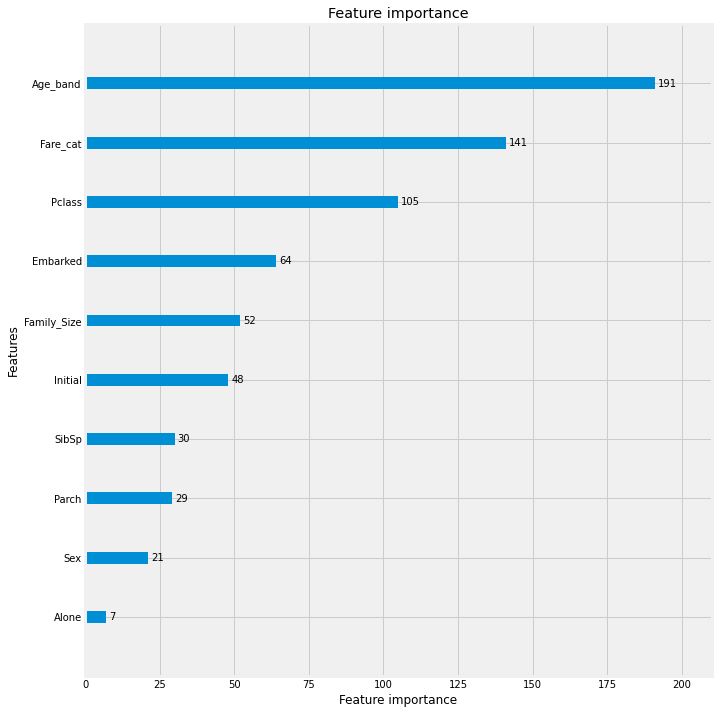

In [328]:

#LightGBM 피쳐 시각화
from lightgbm import plot_importance

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,ax=ax)